In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from IPython.display import display,HTML
from ipywidgets import IntProgress
import pandas as pd


frame_num = 20

def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData

def update_lines(num, ax, pg, dataLines, lines, angles, heights):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    ax.view_init(heights[num], angles[num])
    pg.value = num
    return lines

# Fifty lines of random 3-D lines
data = np.array([Gen_RandLine(25, 3) for index in range(frame_num)])
#print(np.array(data).shape)

angles = np.linspace(0, 360, num=frame_num)
heights = np.concatenate( (np.linspace(0,30,num=100), np.linspace(30,0,num=100)), axis=0 )
len(heights)


200

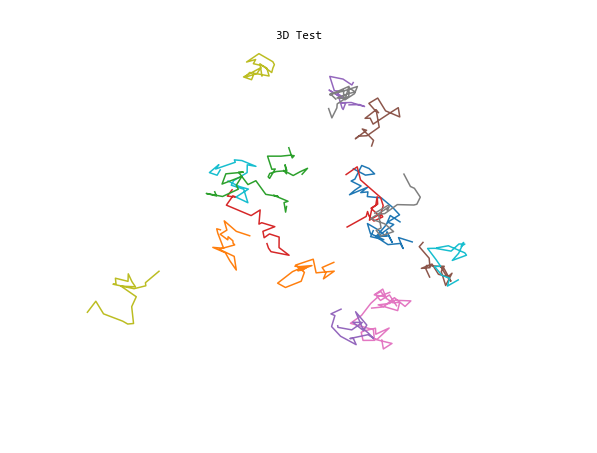

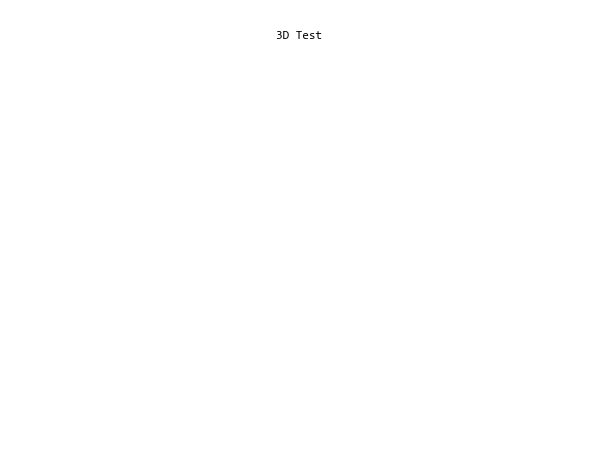

In [5]:

# Attaching 3D axis to the figure
fig = plt.figure(figsize=[8,6])
ax = p3.Axes3D(fig)

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')
ax.set_axis_off()

pg = IntProgress(min=0, max=frame_num, value=0)
display(pg)

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, frames=frame_num, fargs=(ax, pg, data, lines, angles, heights),
                                   interval=50, blit=False)

#HTML(line_ani.to_html5_video())

#pg.close()
update_lines(19, ax, pg, data, lines, angles, heights)
plt.show()

In [3]:
plt.show()